In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import mglearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
X,y = mglearn.datasets.make_forge()

X.shape: (26, 2)


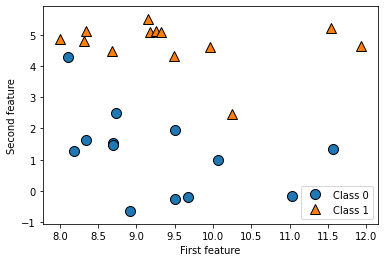

In [4]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['Class 0','Class 1'],loc='best')
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shape: {}'.format(X.shape))

Text(0, 0.5, 'Target')

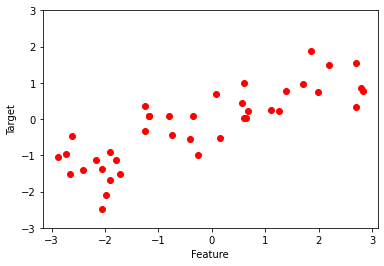

In [5]:
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'ro')
plt.ylim(-3,3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [6]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print('cancer.keys(): \n {}'.format(cancer.keys()))

cancer.keys(): 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
print('Shape of cancer data: {}'.format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [8]:
print('Sample counts per class:\n{}'.format(
    {n: v for n, v in zip(cancer.target_names,np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [9]:
print('Feature names:\n{}'.format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
from sklearn.datasets import load_boston
boston=load_boston()
print('Data shape: {}'.format(boston.data.shape))

Data shape: (506, 13)


In [11]:
X,y=mglearn.datasets.load_extended_boston()
print('X.shape:{}'.format(X.shape))

X.shape:(506, 104)


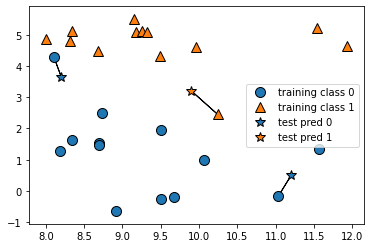

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

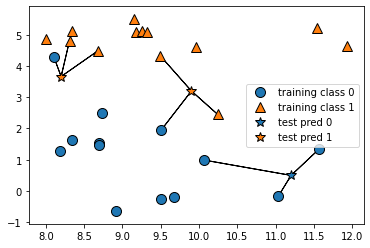

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [15]:
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

In [17]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
print('Test set predictions: {}'.format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [20]:
print('Test set accuracy: {:.2f}%'.format(100*clf.score(X_test,y_test)))

Test set accuracy: 85.71%


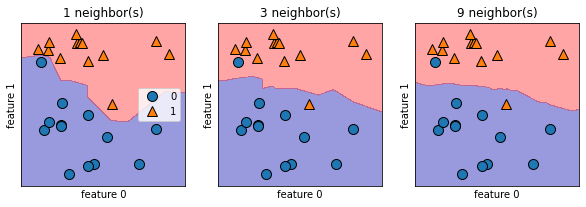

In [24]:
fig,axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors,ax in zip([1,3,9],axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,
                                    fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc='best')

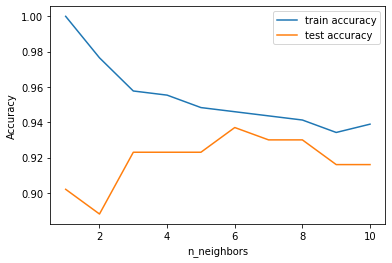

In [37]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,
                                stratify=cancer.target,random_state=66)
train_accuracy=[]
test_accuracy=[]

neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    train_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(neighbors_settings, train_accuracy,label='train accuracy')
plt.plot(neighbors_settings, test_accuracy,label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

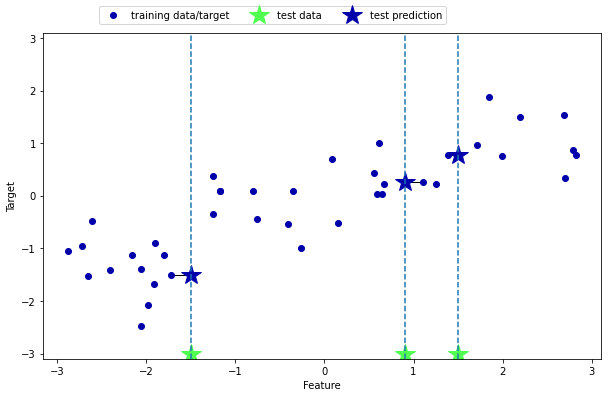

In [38]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

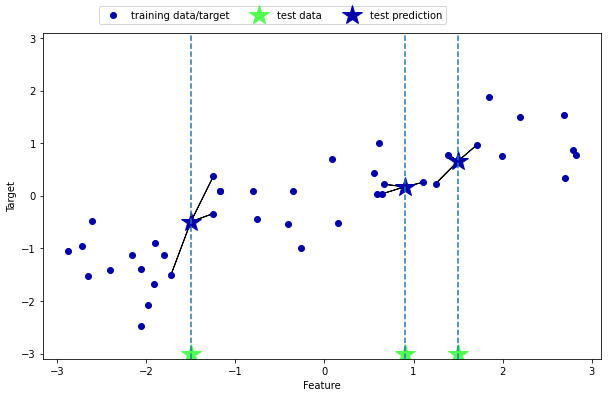

In [39]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [40]:
from sklearn.neighbors import KNeighborsRegressor

X,y=mglearn.datasets.make_wave(n_samples=40)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
reg=KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [41]:
print('Test set predictions:\n{}'.format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [42]:
print('Test set R^2: {:.2f}'.format(reg.score(X_test,y_test)))

Test set R^2: 0.83


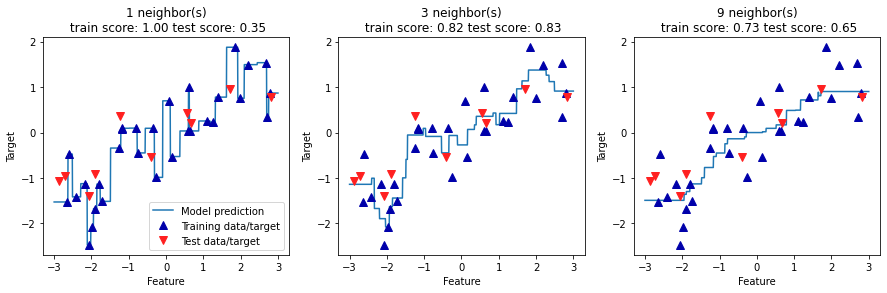

In [43]:
fig,axes=plt.subplots(1,3,figsize=(15,4))

line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors,ax in zip([1,3,9],axes):
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    
    ax.set_title(
    '{} neighbor(s)\n train score: {:.2f} test score: {:.2f}'.format(
    n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model prediction','Training data/target',
                'Test data/target'],loc='best')